<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/3_3_Newton_Raphson_and_secant_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Variable Equations

based in Diego Restrepo notebooks. https://github.com/restrepo/ComputationalMethods

In [ ]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
#from JSAnimation import IPython_display
from matplotlib import animation
from scipy import integrate
from scipy import optimize

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


- - -

# Newton-Raphson Method

Although Fixed-point iteration **is an efficient algorithm as compared with Bisection**, the Newton-Raphson method is an **acceletared convergent scheme** where the roots of a function are easily found with just a few iterations.

## Derivation NM

Although this method can be presented from an algorithmic point of view, the mathematical deduction is very useful as it allows us to understand the essence of the approximation as well as estimating easily the convergence errors.

Let be $f(x)$ a continuous and differentiable function defined within an interval $[a,b]$ (i.e. $f\in \mathcal{C}^2[a,b]$), and $p$ is a root of the function such that $f(p) = 0$. If we give an initial an enough close guess $p_0$ to this root, such that $|p-p_0|<\epsilon$, where $\epsilon$ is adequately small, we can expand the function by using a second order taylor serie, yielding:

$$f(p) = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2}f''(p_0) + \mathcal{O}^3(|p-p_0|)$$

but as $f(p) = 0$ and $|p-p_0|^2<\epsilon^2$ is an even smaller quantity, we can readily neglect from second order terms, obtaining

$$p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1$$

If we repeat this process but now using $p_1$ as our guess to the root instead of $p_0$ we shall obtain:

$$p \approx p_1 - \frac{f(p_1)}{f'(p_1)} \equiv p_2$$

and so...

$$p \approx p_n - \frac{f(p_n)}{f'(p_n)} \equiv p_{n+1}$$

where each new iteration is a better approximation to the real root.

## Steps NM

1. Take your function $f(x)$ and derive it, $f'(x)$.
2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

In [ ]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax):
    #Initial condition
    p = [pini,]
    #Iterations.
    for n in range(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )

    p = np.array( p )

    print("Result:", p[-1])

# Example:

Find one root of the function:

$f(x) = x^2 - x$

with derivative

$f'(x) = 2x -1$

using the Newton-Raphson method.

In [ ]:
#Defining the function
def f(x):
    return x**2-x
#Defining the derivative
def df(x):
    return 2*x-1
#Calculating root
NewtonRaphson( f, df, pini = 0.55, Nmax = 7 )

Result: 1.0000000000069948


In [ ]:
#Defining Newton Method with animation
def NewtonRaphson_Animation( f, fp, pini, Nmax, xmin, xmax ):
    #Initial condition
    p = [pini,]
    p_dash = []
    p_der = []
    #Iterations
    for n in range(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )

    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )

    print("Result:", p[-1])

    #Array X-axis
    X = np.linspace(xmin,xmax,100)

    #Initializing Figure
    fig = plt.figure( figsize=(5,5) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Horizontal line
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )

    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative

    def animate(i):
        #Setting new data
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative

    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

## Example 5 (complet)

Find one root of the function:

$f(x) = x^2 - x$

with derivative

$f'(x) = 2x -1$

using the Newton-Raphson method.

Result: 1.0


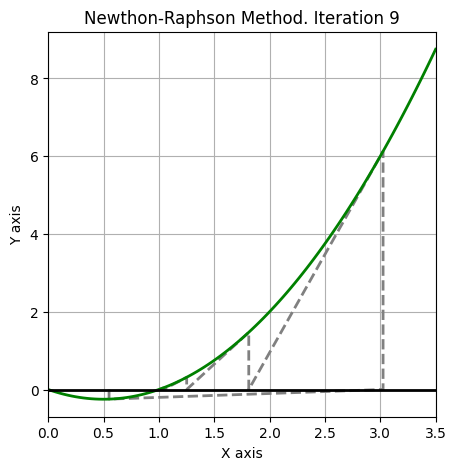

In [ ]:
#Defining the function
def f(x):
    return x**2-x
#Defining the derivative
def df(x):
    return 2*x-1
#Calculating root
ani = NewtonRaphson_Animation( f, df, pini = 0.55, Nmax = 10, xmin = 0, xmax = 3.5 )

HTML(ani.to_jshtml())  # Devuelve la animación en formato html

## Stop conditions NM

The stop conditions are the same than Bisection and Fixed-point iteration:

* A fixed distance between the last two steps (absolute convergence):
    \begin{equation}
    |p_i - p_{i-1}|<\epsilon
    \end{equation}

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

## Convergence NM

It is possible to demonstrate by means of the previous derivation procedure, that the convergence of the Newton-Raphson method is quadratic, i.e., if $p$ is the exact root and $p_n$ is the $n$-th iteration, then

$$|p_{n+1}-p|\leq C |p_n-p|^2$$

for a fixed ans positive constant $C$.

This implies, if the initial guess is good enough such that |p_0-p| is small, the convergence is achieved very fast as each iteration improves the precision twice in the order of magnitude, e.g., if $|p_0-p|\sim 10^{-1}$, $|p_1-p|\sim 10^{-2}$, $|p_2-p|\sim 10^{-4}$, $|p_2-p|\sim 10^{-8}$ and so on.

In [ ]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax ):
    #Initial condition
    p = pini
    #Iterations
    for n in range(Nmax):
        p = p - f(p)/fp(p)
    #Final result
    return p

<font color='red'>
**ACTIVITY**
    
In an Jupyter-notebook, copy the latter routine NewtonRaphson, the Bisection routine, the Fixed-point iteration routine and find the root of the next function using all the methods.
    
$f(x) = x - \cos(x)$
    
Plot in the same figure the convergence of each method as a function of the number of iterations.
</font>

- - -

# Secant Method

The Newton-Raphson method is highly efficient as the convergence is accelerated, however there is a **weakness** with it: one needs to know the derivative of the function beforehand. This aspect may be complicated when dealing with numerical functions or even very complicated analytical functions. Numerical methods to derive the input function can be applied, but this extra procedure may involve an extra computing time that compensates the time spent by using other methods like Bisection.

## Derivation SM

Retaking the iterative expression obtained from the Newton-Raphson method:

$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

the derivative can be approximated as

$$f'(p_n) = \lim_{x\rightarrow p_n} \frac{f(x)-f(p_n)}{x-p_n} $$

As we know, the convergence of the NR method is quadratic, so $p_{n-1}$ should be close enough to $p_n$ such that one can assume $p_{n-1}\rightarrow p_n$ and the previous term is:

$$f'(p_n) \approx \frac{f(p_{n})-f(p_{n-1})}{p_{n}-p_{n-1}} $$

The final expression for the $n$-th iteration of the root is then:

$$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

In this consists the Secant method, **what is just an approximation to the Newton-Raphson method**, but without the derivative term.

## Steps SM

1. Give the input function $f(x)$.
2. Give two guests to the solution (root of $f(x)$). These values would be the seeds $p_0$, $p_1$.
3. The next guest to the solution will be given by

    $$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

<font color='red'>
**ACTIVITY**
    
In an Jupyter-notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

**ACTIVITY INTERESTING** Not evauable


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance.
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point.
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle.

Since from observations $\theta$ is known, the problem to be solved per pixel usually is

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta)
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one.

<img src="./figures/lente1.png">

This equation can also be written in terms of distances

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi })
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$.


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of
the data for the len and image that is going to be distorted.


In [ ]:
#Superficial density of the lens
def Sup_density(radio):
    return radio*M*len(r[r<radio])/radio**2.

#Deviation angle due to the gravitational len
def des_angle( radio ):
    return 2*np.pi*4*G*integrate.quad( Sup_density ,0, radio )[0]/(radio*c**2)

#Len equation
def Len_equation(radio, eta):
    return eta - Ds*radio/Dd - Dds*des_angle( radio )


In [ ]:
# Len distribution generated
M = 3e7
L = 1e5
puntos = 6
Ds = 1000
Dd = 900
Dds = Ds - Dd
G = 4.302e-3# pc M_sun**-1(km/s)**2
c = 3e6 # km/s
x = np.linspace(0,L,puntos)
y = np.linspace(0,L,puntos)
X,Y = np.meshgrid(x,y)
#Generating meshgrid of points
X = np.reshape(X,puntos*puntos)
Y = np.reshape(Y,puntos*puntos)
r = np.sqrt(X**2 + Y**2)

#Image to be distorted
Li = 5
ni = 8
X0 = np.linspace(-Li,Li,ni)
Y0 = np.linspace(-Li,Li,ni)
#Generating meshgrid of points
X0,Y0 = np.meshgrid(X0,Y0)
r0 = np.sqrt( X0**2 + Y0**2 )
theta = np.zeros((ni,ni))
epsilon = np.zeros((ni,ni))

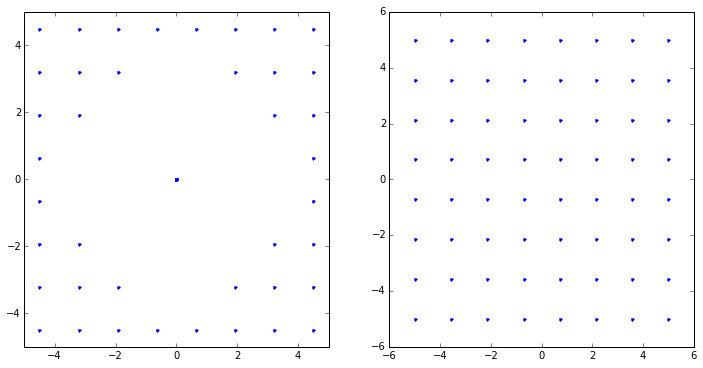

In [ ]:
xc = epsilon*np.cos(theta)
yc = epsilon*np.sin(theta)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(xc,yc,'b.');
plt.subplot(1,2,2)
plt.plot(X0,Y0,"b.");